# Data Mining Project

Authors:
    Di Nosse Daniele Maria,
    Lasala Angelo,
    Paradiso Raffaele

!pip install outlier_utils

Moduli da importare

In [1]:
%matplotlib inline
import math
import re # regular expression
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from outliers import smirnov_grubbs as grubbs
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import DBSCAN

Importare il DataFrame

In [2]:
df = pd.read_csv('Test_HR_Employee_Attrition.csv') #(delimiter='\t')

Operazioni base su DataFrame

In [ ]:
print(df.head(3)) # Print prime 3 righe
print(df.tail(3)) # Print ultime 3 righe
print(df.columns) # Print attribute
print(df['Age'][0:5]) # Print una sola colonna e prime 5 righe
print(df[['Age', 'JobLevel']]) # Print più colonne
print(df.iloc[1:4]) # Stampa intere righe (ultima esclusa)
print(df.iloc[1,1]) # Stampa un elemento preciso in questo caso riga 1 colonna 1
print(df.loc[df['Attrition'] == 'Yes']) # Finding a specific value for the attribute in a dataset
print(df.loc[df['Attrition'].str.contains('Yes|no', flags=re.I, regex=True)])
print(df.dtypes) # Stampa il tipo degli attributi
print(df.shape) # Shape del DataFrame
print(df.sort_values(['Age', 'YearsWithCurrManager'], ascending=[1,0])) #sorted data (NaN in coda)
print(df.describe()) # print count,mean,std,min,25%,50%,75%,max
print(df.loc[~df['MaritalStatus'].str.contains('Single')]) # Drop tutte le righe con single in marital status
print(df['Age'].unique()) # valori non ripetuti attributo "Age"
print(df.groupby(['Age']).mean().sort_values('YearsWithCurrManager', ascending=False))# valori divisi in gruppi per età

# df['T'] = df[''] + df[''] # Addizionare colonne
# df['T'] = df.iloc[:, i:j].sum(axis=1) #axis=1 somma orizzontalmente, =0 verticalmente
# df.to_csv = ('.csv', index=False)
# df.to_excel = ('.xlsx', index=False)
# df.to_csv = ('.txt', index=False, sep='\t')

#Stampa minimo e massimo dei valori nelle singole colonne e i loro range:
# 1° modo
# l = [0,3,5,6,8,10,11,12,14,16,17,18,21,22,23,24,25,26,27,28,29,30,31,32]
# for i in range(len(l)):
#    print(f' {l[i]} : min e max di {df.columns[l[i]]} sono {min(df.values[:,l[i]])} e
#                     {max(df.values[:,l[i]])}. Range -->
#                     {max(df.values[:,l[i]])-min(df.values[:,l[i]])}.')

# 2° modo
# print(df.min())
# print(numeric.max() - numeric.min())
# print((numeric.max() - numeric.min()).idxmax())
# print(df[(numeric.max() - numeric.min()).idxmax()])

# etamin = (df[(df['Age'] > 17) & (df['Age'] < 19)]) # Solo le righe con valori di età >17 & < 19
# etamin = etamin.reset_index(drop=True) # Resetta indici

#conoscere i valori max e min del guadagno mensile di gruppi organizzati per relazione coniugale
# print(df.groupby(['MaritalStatus'], sort=False)['MonthlyIncome'].max())
# print(df.groupby(['MaritalStatus'], sort=False)['MonthlyIncome'].min())

# Istogrammi

Text(0, 0.5, 'Number of employes')

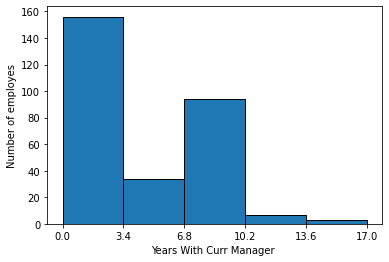

In [3]:
plt.hist(df.values[:,32],bins = 5, edgecolor='k') #edge color,hist separati da linea NEGRA
plt.xticks(np.arange(0,20.4, 3.4))
plt.xlabel('Years With Curr Manager ')
plt.ylabel('Number of employes')

# handles=[Line2D([0],[0],marker='o',color='w',linestyle='',
#                       markerfacecolor='w'),Line2D([0],[0],marker='o',color='w',
#                       markerfacecolor='w'),Line2D([0],[0],marker='o',color='w',
#                       markerfacecolor='w'),Line2D([0],[0],marker='o',color='w',
#                       markerfacecolor='w')]

# labels=['1 Low','2 Medium','3 High','4 Very high']
# plt.legend(handles,labels, edgecolor='w', loc='upper left')

#sub plot organizzati in matrici, una sola figura più plot
# figure, axes = plt.subplots(4, 4)
# # df['Age'].plot(ax=axes[0])
# for i in range(0,4):
#     for j in range(0,4):
#         df['Age'].plot(ax=axes[i,j])

#bins = np.arange(x0, x1 + 1.5) - 0.5 # per centrare i bin
# plt.savefig("figure.png") # save as png

## Statistica

In [4]:
statistica = df.describe()
statistica.to_excel('statistica.xlsx') #esporta la tabella in excel
df = df.drop(columns=['StandardHours']) # Rimuovere colonne
df = df.drop(columns=['Over18'])

TRASFORMAZIONE DEI DATI NUMERICI IN CATEGORICI(OVVIAMENTE PER QUELLI CHE LO PREVEDONO)

In [5]:
df.replace({'EnvironmentSatisfaction':{1 : 'Low', 2 : 'Medium',
                                       3 : 'High', 4 : 'Very High'}},inplace=True)
df.replace({'JobInvolvement':{1 : 'Low', 2 : 'Medium',
                              3 : 'High', 4 : 'Very High'}},inplace=True)
df.replace({'JobSatisfaction':{1 : 'Low', 2 : 'Medium',
                               3 : 'High', 4 : 'Very High'}},inplace=True)
df.replace({'RelationshipSatisfaction':{1 : 'Low', 2 : 'Medium',
                                        3 : 'High', 4 : 'Very High'}},inplace=True)
df.replace({'Education':{1 : 'Below College', 2 : 'College',
                         3 : 'Bachelor', 4 : 'Master', 5 : 'Doctor'}},inplace=True)
df.replace({'WorkLifeBalance':{1 : 'Bad', 2 : 'Good',
                               3 : 'Better', 4 : 'Best'}},inplace=True)
df.replace({'PerformanceRating':{1 : 'Low', 2 : 'Good',
                                 3 : 'Excellent', 4 : 'Outstanding'}},inplace=True)

# # joblevel valori numerici ma chiaramente categorici,
# non abbiamo ulteriori informazioni, chiediamo aiuto, per piacere rispondete. stop.
# # totalworkingyear non ha molto senso a nostro avviso
# cioè a 18 anni non puoi aver lavorato una media di 8 anni(QUALITÀ BASSA)

df.replace({'JobLevel':{1 : '1', 2 : '2', 3 : '3', 4 : '4', 5 : '5'}},inplace=True)
df.to_excel('nuovo.xlsx') # NUOVO DATA FRAME MODIFICATO

categorical = df.select_dtypes(exclude='number') # SELEZIONA SOLO LE COLONNE CATEGORICHE
numeric = df.select_dtypes('number') # SELEZIONA SOLO LE COLONNE NUMERICHE
categorical = categorical.dropna()
numeric = numeric.dropna()
# print(categorical.iloc[0]) # PRINT DELLA PRIMA RIGA DI CATEGORICAL

In [6]:
# NUOVO DATAFRAME SENZA MISSING (PER ORA SOLO NEGLI ATTRIBUTI CATEGORICI)
categorical = categorical.fillna('MISSING')

In [7]:
# RICERCA OUTLIERS NELLE COLONNE CON UN PACCHETTINO IMPORTATO SOPRA
#  E ALPHA CHE NON SAPPIAMO COME SCEGLIERNE IL VALORE
# for index, columns in numeric.iteritems():
#     outremove = grubbs.test(numeric[index], alpha=0.05)
#     print(numeric.shape, outremove.shape)

(array([-1,  0], dtype=int64), array([  8, 143], dtype=int64))


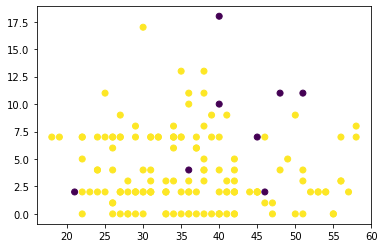

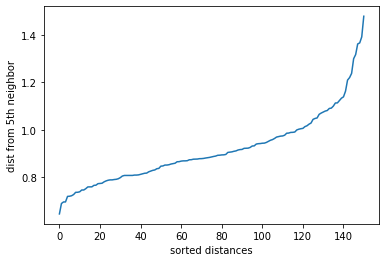

In [8]:
# RICERCA OUTLIERS NELLE COLONNE CON UN DBSCAN (NEL FARLO SI SONO ELIMINTATI I VALORI NaN)
scaler = MinMaxScaler()
X = scaler.fit_transform(numeric)
dbscan = DBSCAN(eps=1.02, min_samples=5)
dbscan.fit(X)
print(np.unique(dbscan.labels_, return_counts=True))
plt.scatter(numeric['Age'], numeric['YearsInCurrentRole'], c=dbscan.labels_)
plt.show()

dist = pdist(X, 'euclidean') #pair wise distance
dist = squareform(dist) #distance matrix given the vector dist

k = 5
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' %k)
plt.xlabel('sorted distances')
plt.show()

In [ ]:
#-----------------------------MATRICE CORRELLAZIONE-----------------------------
corrmatrix = df.corr()
print(corrmatrix)
for index in range(len(corrmatrix.columns)): # Iteration for each columns
    vecmax = corrmatrix.iloc[index]
    vecmax2 = [i for i in vecmax if i < 1]
    print(max(vecmax2))
corrmatrix.to_excel('MatriceDiCorrelazione.xlsx') # ESPORTA MATRICE CORRELAZIONE
pd.plotting.scatter_matrix(df.iloc[:,:], diagonal='kde') # PLOT MATRICE SCATTER
plt.show()

In [ ]:
# SCATTER FOTTUTI PLOT (TUTTI)
for index_n, columns in numeric.iteritems():
    if index_n !='Age':
        for index, columns in categorical.iteritems():
            for c in categorical[index].unique():
                    dfc = df[df[index] == c]
                    plt.scatter(dfc['Age'], dfc[index_n], label=c)
            plt.legend(bbox_to_anchor=(1,1))
            plt.xlabel('Age')
            plt.title('Attribute: '+index)
            plt.ylabel(index_n)
            plt.show()
for index, columns in categorical.iteritems():
    for c in categorical[index].unique():
        dfc = df[df[index] == c]
        plt.scatter(dfc['YearsInCurrentRole'], dfc['YearsWithCurrManager'], label=c)
    plt.legend(bbox_to_anchor=(1,1))
    plt.show()

In [ ]:
# BOX PLOT
for element in numeric.columns:
    plt.figure()
    df.boxplot(element)

In [ ]:
# PRINCIPAL COMPONENT ANALYSIS
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
x0 = numeric.values
x1 = StandardScaler().fit_transform(x0)
pca = PCA(n_components = 3)
principalComponents = pca.fit_transform(x1)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1',
                                            'principal component 2', 'principal component 3'])
finalDf = pd.concat([principalDf, df[['Attrition']]], axis = 1)
targets = ['Yes', 'No']
colors = ['r','b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Attrition'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
                finalDf.loc[indicesToKeep, 'principal component 2'],
                finalDf.loc[indicesToKeep, 'principal component 3'],
                c=color, s=50)
plt.legend(targets)
print(pca.explained_variance_ratio_)

In [ ]:
p = df['TrainingTimesLastYear'].value_counts(normalize=True) * 100 # percent. degli attributi categ.